<a href="https://colab.research.google.com/github/Xw-Jia/2019_SaveYourself_GetOffer/blob/master/%E4%B9%A6%E7%9B%AE%E6%95%B4%E7%90%86/Python%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0/Part2%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E5%AE%9E%E8%B7%B5/%E4%BB%A3%E7%A0%81/6_2_understanding_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.16.2

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
'''
准备IMDB数据
'''
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 作为特征的单词数
maxlen = 500  # 最大序列长度
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
'''
构建RNN模型并训练
'''
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.6556 - acc: 0.5989 - val_loss: 0.5177 - val_acc: 0.7868
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.4339 - acc: 0.8124 - val_loss: 0.3863 - val_acc: 0.8382
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.3270 - acc: 0.8685 - val_loss: 0.3376 - val_acc: 0.8596
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2646 - acc: 0.8972 - val_loss: 0.3975 - val_acc: 0.8344
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2161 - acc: 0.9174 - val_loss: 0.4219 - val_acc: 0.8598
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1679 - acc: 0.9388 - val_loss: 0.3531 - val_acc: 0.8704
Epoch 7/1

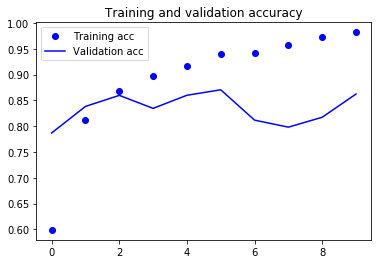

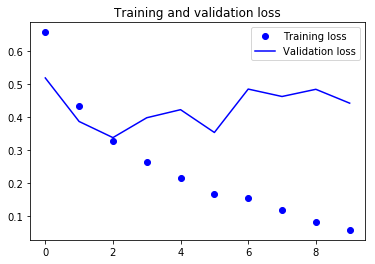

In [5]:
'''
绘制结果
'''
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

val的精度只有85%，甚至比简单Dense要差

考虑：是不是因为maxlen只取了前500？没有把整个序列放进去；

另外，SimpleRNN不适合处理文本序列

In [7]:
'''
使用Keras中的LSTM层
'''
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 116s 6ms/step - loss: 0.5238 - acc: 0.7523 - val_loss: 0.3590 - val_acc: 0.8544
Epoch 2/5
20000/20000 [==============================] - 116s 6ms/step - loss: 0.3036 - acc: 0.8818 - val_loss: 0.3567 - val_acc: 0.8446
Epoch 3/5
20000/20000 [==============================] - 118s 6ms/step - loss: 0.2399 - acc: 0.9098 - val_loss: 0.3366 - val_acc: 0.8554
Epoch 4/5
20000/20000 [==============================] - 118s 6ms/step - loss: 0.2028 - acc: 0.9239 - val_loss: 0.3255 - val_acc: 0.8726
Epoch 5/5
20000/20000 [==============================] - 116s 6ms/step - loss: 0.1797 - acc: 0.9340 - val_loss: 0.2852 - val_acc: 0.8880


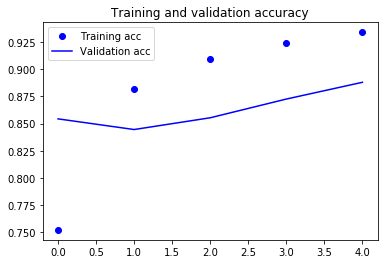

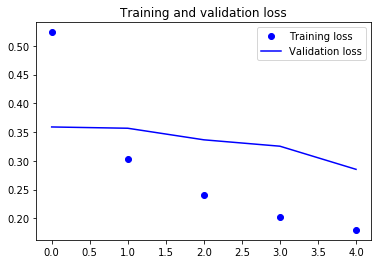

In [8]:
'''
画图
'''
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()